In [1]:
#This Model is build using Steps by Google Codelab for building Computer Vision Model using Tensorflow
#To install tensorflow
#Follow steps mentioned in link: https://www.tensorflow.org/install/pip#windows
#import tensorflow onto python shell
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
#In this I will train a neural network to recognize items of clothing from a common dataset called Fashion MNIST
#########The Fashion MNIST data is available in the tf.keras.datasets API.#############
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#Calling load_data on that object gives you two sets of two lists: training values and testing values, which represent graphics that show clothing items and their labels.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

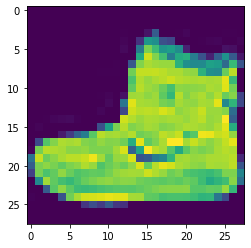

In [3]:
##Printing a training image and a training label to see how these values look like.
##The print of the data for item 0 looks like this:
from matplotlib import pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [4]:
# Take a note that all the values are integers between 0 and 255.
#When training a neural network, it's easier to treat all values as between 0 and 1, a process called normalization.
#Fortunately, Python provides an easy way to normalize a list like that without looping.

training_images  = training_images / 255.0
test_images = test_images / 255.0

6
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.         0.         0.14509804
  0.75294118 0.69411765 0.67058824 0.78039216 0.10588235 0.
  0.         0.         0.00392157 0.01176471 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.03529412 0.         0.         0.         0.         0.52941176
  0.90196078 0.63529412 0.60784314 0.99215686 0.64313725 0.05490196
  0.         0.         0.         0.         0.01176471 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.
  0.         0.         0.25098039 0.59607843 0.90980392 0.81176471
  0.76470588 0.60784314 0.61568627 0.78823529 0.89019608 0.87843137
  0.86666667 0.6745098  0.36862745 0.01568627 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.43921569 0.70196078 0.80392157 0.

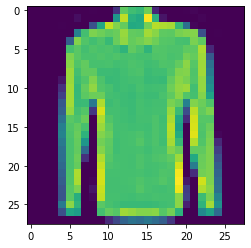

In [5]:
#If i want to look at different product/accessory other than 0 i can check by simply changing value in training images

plt.imshow(training_images[40])
print(training_labels[40])
print(training_images[40])

In [6]:
############ DESIGNING THE MODEL #################

#Three Layers

mymodel= tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
#### INFORMATION must know for layers
# Sequential:  defines a sequence of layers in the neural network.
# Flatten:  takes a square and turns it into a one-dimensional vector.
# Dense:  adds a layer of neurons.
# Activation functions:  tell each layer of neurons what to do. There are lots of options, but use these for now:
# Relu:  effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
# Softmax:  takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].

In [9]:
#######  TIME TO COMPILE AND TRAIN THE MYMODEL ########

#Step1 : Create a model by first compiling it with an optimizer and loss function, then train it on your training data and labels. 
#The goal is to have the model figure out the relationship between the training data and its training labels. Later, you want your model to see data that resembles your training data, then make a prediction about what that data should look like.
# (metrics= )as a parameter, which allows TensorFlow to report on the accuracy of the training by checking the predicted results against the known answers (the labels).
# When model.fit executes, you'll see loss and accuracy:
# Epochs are number of iterations
# ADAM optimizer is used in this case

mymodel.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

mymodel.fit(training_images, training_labels, epochs=7)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2790 - accuracy: 0.8976
Epoch 2/7
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2664 - accuracy: 0.9019
Epoch 3/7
60000/60000 [==============================] - 8s 131us/sample - loss: 0.2555 - accuracy: 0.9051
Epoch 4/7
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2460 - accuracy: 0.9087
Epoch 5/7
60000/60000 [==============================] - 10s 167us/sample - loss: 0.2373 - accuracy: 0.9124
Epoch 6/7
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2299 - accuracy: 0.9148
Epoch 7/7
60000/60000 [==============================] - 10s 173us/sample - loss: 0.2222 - accuracy: 0.9161


In [11]:
###### TEST THE MODEL and report the loss for each ##########

mymodel.evaluate(test_images, test_labels)


10000/10000 [==============================] - 1s 106us/sample - loss: 0.3718 - accuracy: 0.8731


[0.3718183953762054, 0.8731]

In [ ]:
## AS I can see that the model is not as accurate with the unknown data as it was with the data it was trained on! As you learn more about TensorFlow, you'll find ways to improve that.

In [13]:
### Exercise 1 : creates a set of classifications for each of the test images, then prints the first entry in the classifications.

classifications = mymodel.predict(test_images)
print(classifications[0])


[1.6616173e-09 1.5108975e-10 7.1563883e-10 2.4561736e-10 6.6940664e-10
 2.4897012e-05 3.8245671e-10 1.6629111e-03 2.8012716e-08 9.9831212e-01]


In [ ]:
## Learnings from above exercise
#The output of the model is a list of 10 numbers. Those numbers are a probability that the value being classified is the corresponding label. 
#1. Notice that they are all very low probabilities except one. Also, because of Softmax, all the probabilities in the list sum to 1.0.
#The list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. 
#The list having the 10th element being the highest value means that the neural network has predicted that the item it is classifying is most likely an ankle boot.


In [14]:
## Exercise 2: Look at the layers in your model. Experiment with different values for the dense layer with 512/1024 neurons.

mymodel= tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [15]:
mymodel.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

mymodel.fit(training_images, training_labels, epochs=7)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 38s 632us/sample - loss: 0.4693 - accuracy: 0.8318
Epoch 2/7
60000/60000 [==============================] - 36s 598us/sample - loss: 0.3596 - accuracy: 0.8679
Epoch 3/7
60000/60000 [==============================] - 35s 586us/sample - loss: 0.3213 - accuracy: 0.8812
Epoch 4/7
60000/60000 [==============================] - 36s 605us/sample - loss: 0.2969 - accuracy: 0.8902
Epoch 5/7
60000/60000 [==============================] - 37s 611us/sample - loss: 0.2788 - accuracy: 0.8960
Epoch 6/7
60000/60000 [==============================] - 38s 638us/sample - loss: 0.2633 - accuracy: 0.9015- loss: 0.2633 - accuracy: 0.
Epoch 7/7
60000/60000 [==============================] - 35s 589us/sample - loss: 0.2500 - accuracy: 0.9052


In [16]:
mymodel.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 325us/sample - loss: 0.3305 - accuracy: 0.8835


[0.33046564848423005, 0.8835]

In [17]:
##Note : By increase to 1,024 neurons,I see that model have to do more calculations, slowing down the process.
#But in this case they have a good impact because the model is more accurate.
#That doesn't mean more is always better. You can hit the law of diminishing returns very quickly.

##Exercise 3: What would happen if you remove the Flatten() layer. Why do you think that's the case?
mymodel= tf.keras.models.Sequential([ 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [18]:
mymodel.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

mymodel.fit(training_images, training_labels, epochs=7)

Train on 60000 samples
Epoch 1/7
   32/60000 [..............................] - ETA: 1:57

ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).

In [ ]:
## I got an value error about the shape of the data because details of the error may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. 
#Right now this data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to flatten that 28,28 into a 784x1.
## Instead of writing all the code, add the Flatten() layer at the beginning. When the arrays are loaded into the model later, they'll automatically be flattened for you.

In [19]:
## Exercise 4: Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10?
## Try training network with 5.
mymodel= tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

In [20]:
mymodel.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

mymodel.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
   32/60000 [..............................] - ETA: 38:48

InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 6 4 5 4 8 0 9 0 9 5 3 8 1 8 2 0 1 6 0 0 1 6 4 2 3 1 9 5 8 8 3 1
	 [[node loss/output_1_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-20-bcf11a7a0b39>:5) ]] [Op:__inference_distributed_function_112032]

Function call stack:
distributed_function


In [23]:
## After performing above task I realised that number of neurons in the last layer should match the number of classes you are classifying for.
#In this case, it's the digits 0 through 9, so there are 10 of them, and hence you should have 10 neurons in your final layer.

## Exercise 5 : Consider the effects of additional layers in the network. 
#What will happen if you add another layer between the one with 512 and the final layer with 10?
#4layers
mymodel= tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [24]:
mymodel.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

mymodel.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 37s 621us/sample - loss: 0.4681 - accuracy: 0.8292
Epoch 2/5
60000/60000 [==============================] - 36s 608us/sample - loss: 0.3575 - accuracy: 0.8688
Epoch 3/5
60000/60000 [==============================] - 37s 624us/sample - loss: 0.3203 - accuracy: 0.8819
Epoch 4/5
60000/60000 [==============================] - 43s 714us/sample - loss: 0.2982 - accuracy: 0.8891
Epoch 5/5
60000/60000 [==============================] - 52s 859us/sample - loss: 0.2786 - accuracy: 0.8945


In [ ]:
## I observe that there is no significant impact because it is relatively simple data, If there are large data sets more layers are often necessary.

In [25]:
##Exercise 6: Before you trained, you normalized the data, going from values that were 0 through 255 to values that were 0 through 1. 
#What would be the impact of removing that? 

import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])
Back


2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 28s 468us/sample - loss: 4.4249
Epoch 2/5
60000/60000 [==============================] - 25s 425us/sample - loss: 0.5531
Epoch 3/5
60000/60000 [==============================] - 25s 425us/sample - loss: 0.5151
Epoch 4/5
60000/60000 [==============================] - 28s 464us/sample - loss: 0.5140
Epoch 5/5
10000/10000 [==============================] - 4s 392us/sample - loss: 0.5049
[5.6950942e-23 7.8372761e-16 1.6065391e-25 1.1465670e-16 1.1341558e-24
 5.5459846e-04 2.5862096e-20 8.5016452e-03 5.4593984e-15 9.9094373e-01]
9


NameError: name 'Back' is not defined

In [ ]:
## Imprtant things to know about Normalization after running above code
# Normalization is a generic concept not limited only to deep learning or to Keras.
# I have performed a test without this normalization and I have seen that the performance (accuracy) of the network has decreased (keeping the same number of epochs). Why has this happened?

# If I increase the number of epochs, the accuracy can reach the same level reached by the model trained with normalization?

# So, the normalization affects the accuracy, or only the training speed?
# Does Normalization always increase the accuracy?

# Apparently, No. It is not necessary that normalization always increases accuracy. It may or might not, you never really know until you implement. Again it depends on at which stage in you training you apply normalization, on whether you apply normalization after every activation, etc.

# As the range of the values of the features gets narrowed down to a particular range because of normalization, its easy to perform computations over a smaller range of values. So, usually the model gets trained a bit faster.

# Regarding the number of epochs, accuracy usually increases with number of epochs provided that your model doesn't start over-fitting.

### Good Explanation I found on Stack overflow:

# Why to normalize?

# Let me take a simple logistic regression example which will be easy to understand and to explain normalization.
# Assume we are trying to predict if a customer should be given loan or not.
# Among many available independent variables lets just consider Age and Income.
# Let the equation be of the form:
#     Y = weight_1 * (Age) + weight_2 * (Income) + some_constant
# Just for sake of explanation let Age be usually in range of [0,120] and let us assume Income in range of [10000, 100000].
# The scale of Age and Income are very different.
# If you consider them as is then weights weight_1 and weight_2 may be assigned biased weights. 
# weight_2 might bring more importance to Income as a feature than to what weight_1 brings importance to Age. 
# To scale them to a common level, we can normalize them.
# For example, we can bring all the ages in range of [0,1] and all incomes in range of [0,1].
# Now we can say that Age and Income are given equal importance as a feature.